In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['Target'] = iris.target


In [3]:
df3 = df[df['Target'] == 2].head(40)
df1 = df[df['Target'] == 1].head(40)
df2 = df[df['Target'] == 0].head(40)

In [4]:
df_combined = pd.concat([df1, df2, df3])
df_combined

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
...,...,...,...,...,...
135,7.7,3.0,6.1,2.3,2
136,6.3,3.4,5.6,2.4,2
137,6.4,3.1,5.5,1.8,2
138,6.0,3.0,4.8,1.8,2


In [5]:
X = df_combined[['petal width (cm)', 'sepal length (cm)', 'sepal width (cm)']]
y = df_combined['petal length (cm)']


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
k_values = range(5, 21)
mse_values = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

In [8]:
optimal_k = k_values[mse_values.index(min(mse_values))]
optimal_mse = min(mse_values)

optimal_k, optimal_mse

(6, 0.061099537037037)

Text(0.5, 1.0, 'KNN MSE ERROR for different k values')

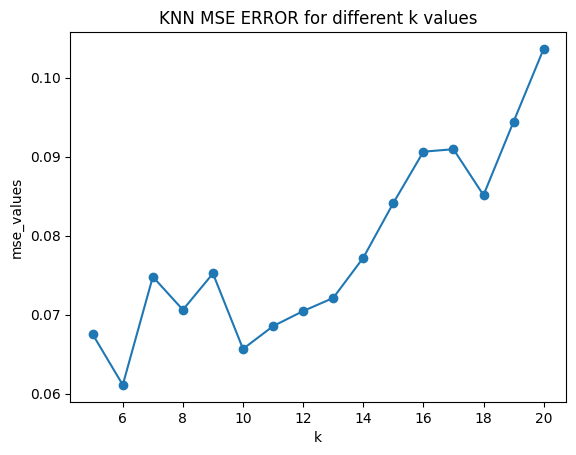

In [13]:
import matplotlib.pyplot as plt
plt.plot(k_values, mse_values, marker='o')
plt.xlabel('k')
plt.ylabel('mse_values')
plt.title('KNN MSE ERROR for different k values')